In [1]:
import sncosmo
import numpy as np
import scipy.stats as stats
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def M_obs(x1, c, M_corrected):
    """
    Applies the Tripp Formula to correlate absolute magnitude with colour and stretch.
    Values for Alpha and Beta are taken from Scolnic & Kessler (2016).

    :param x1: stretch parameter for the SALT2 model
    :param c: colour parameter for the SALT2 model
    :param M_corrected: The absolute magnitude of the supernova without stretch and colour correlations
    :return: M_observed: The absolute magnitude of the supernova correlated with its stretch and colour
    """
    Alpha = 0.14
    Beta = 3.1
    M_observed = - Alpha * x1 + Beta * c + M_corrected
    return M_observed

def light_curve(z_source):
    """
    Samples light curve parameters from stretch and colour distributions based on Scolnic & Kessler (2016)
    and returns a type Ia SN light curve model from SNcosmo.

    :param z_source: redshift of the supernova
    :return: SNcosmo model of the supernova light curve, stretch parameter, colour parameter, MW dust contribution,
             observed absolute magnitude
    """
    H_0 = 70
    dustmodel = sncosmo.F99Dust(r_v=3.1)
    model = sncosmo.Model(source='salt3', effects=[dustmodel], effect_names=['mw'], effect_frames=['obs'])
    H_0_fid = 74.03                                      # SH0ES 2019 value
    M_fid = -19.24                                       # Absolute magnitude corresponding to SH0ES 2019 H0 value

    MW_dust = np.random.uniform(0, 0.2)                  # Sample E(B-V)
    x1 = stats.skewnorm.rvs(-8.241, 1.2311, 1.6712)      # Sample stretch parameter
    c = stats.skewnorm.rvs(2.483, -0.08938, 0.1215)      # Sample colour parameter
    M_cosmo = 5 * np.log10(H_0 / H_0_fid) + M_fid        # Cosmology correction to absolute magnitude
    M_corrected = np.random.normal(M_cosmo, 0.12)        # Absolute magnitude without colour/stretch correlation
    M_observed = M_obs(x1, c, M_corrected)               # Absolute magnitude with colour/stretch correlation

    model.set(z=z_source, t0=0.0, x1=x1, c=c, mwebv=MW_dust)
    cosmo = FlatLambdaCDM(H0=H_0, Om0=0.3, Ob0=0.05)
    model.set_source_peakabsmag(M_observed, 'bessellb', 'ab', cosmo=cosmo)
    x0 = model.get('x0')
    model.set(x0=x0)
    return model, x1, c, MW_dust, M_observed

Text(0, 0.5, 'Apparent magnitude')

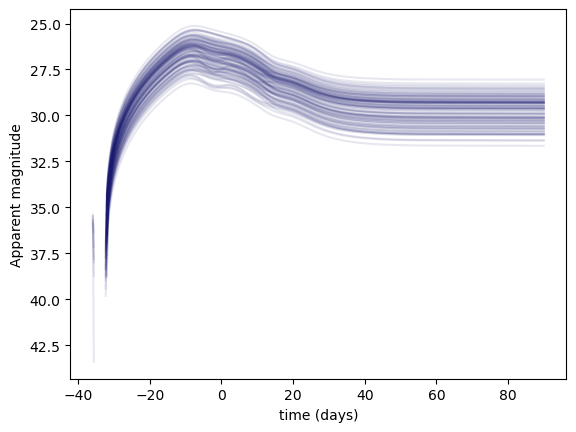

In [16]:
z_source = 0.8
bandpass = 'lsstg'
times = np.linspace(-50, 250, 1000)

for i in range(100):
    
    model, _, _, _, _ = light_curve(z_source)
    mags = model.bandmag(bandpass, time=times, magsys='ab')

    plt.plot(times, mags, color='midnightblue', alpha=0.1)
    
plt.gca().invert_yaxis()
plt.xlabel("time (days)")
plt.ylabel("Apparent magnitude")

[[0.09299357 0.51958572 0.45701584]
 [0.2234336  0.65210602 0.89592518]
 [0.95773602 1.30777242 0.39025655]
 ...
 [0.73498757 1.12151126 0.23338135]
 [0.61615153 0.59518547 0.04110726]
 [0.07425625 1.08639629 0.65286454]]
0.8309718924714712


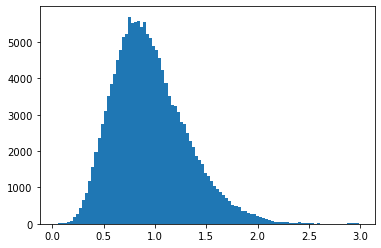

In [76]:
data = np.load("../data/sample_zl_zsn_theta.npz")['zlens_zSN_theta']

print((data))
zs = data[:,1]

plt.figure(2)
plt.hist(zs, bins=100)

print(len(zs[zs > 2]) / len(zs) * 100)

In [78]:
zeropoint = sncosmo.ABMagSystem(name='ab').zpbandflux('ztfr')
print(zeropoint)

1109021.5843106203


In [79]:
zeropoint = sncosmo.ABMagSystem(name='ab').zpbandflux('ztfg')
print(zeropoint)

1256598.9579155657


In [ ]:
'baseline_v2.0_10yrs.db'